# Teil 5 Demo 2: Aufwertung von Daten mit Bezugsdaten

## Bibliotheken & Konfiguration

In [1]:
packages <- c("readr", "dplyr", "tidyr", "lubridate", "ggplot2", "zoo", "forcats", "grid", "gtable")
install.packages(setdiff(packages, rownames(installed.packages())))
lapply(packages, require, character.only = TRUE)

base_url <- "https://raw.githubusercontent.com/ganslats/TMF-School-2022-Block-4/master/Rohdaten/covid/"

Loading required package: readr

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: lubridate


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: ggplot2

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: forcats

Loading required package: grid

Loading required package: gtable



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

## Covid19-Inzidenzdaten Mannheim laden

### Quelle

COVID-19 Datenhub des RKI beim Bundesamt für Kartographie und Geodäsie
URL: https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0
Die Daten sind die „Fallzahlen in Deutschland“ des Robert Koch-Institut (RKI) und stehen unter der Open Data Datenlizenz Deutschland – Namensnennung – Version 2.0 zur Verfügung. (https://www.govdata.de/dl-de/by-2-0)
Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0

Aufbereitung für den Kurs: Filterung auf Mannheim, Auswahl relevanter Spalten, Aggregation von Teilmeldungen pro Tag

In [2]:
mannheim.incidence.long <- read_delim(paste(base_url, "covid_mannheim_incidence.csv", sep=""),
                                      col_types = cols(date = col_date(format = ""), category = col_character(), variable = col_character(), value = col_double()),
                                      delim = ";")
head(mannheim.incidence.long)

date,category,variable,value
<date>,<chr>,<chr>,<dbl>
2020-02-15,incidence,incidence,1
2020-02-18,incidence,incidence,1
2020-02-25,incidence,incidence,3
2020-02-28,incidence,incidence,1
2020-02-29,incidence,incidence,2
2020-03-01,incidence,incidence,4


## Mannheimer Covid19-Inzidenz plotten

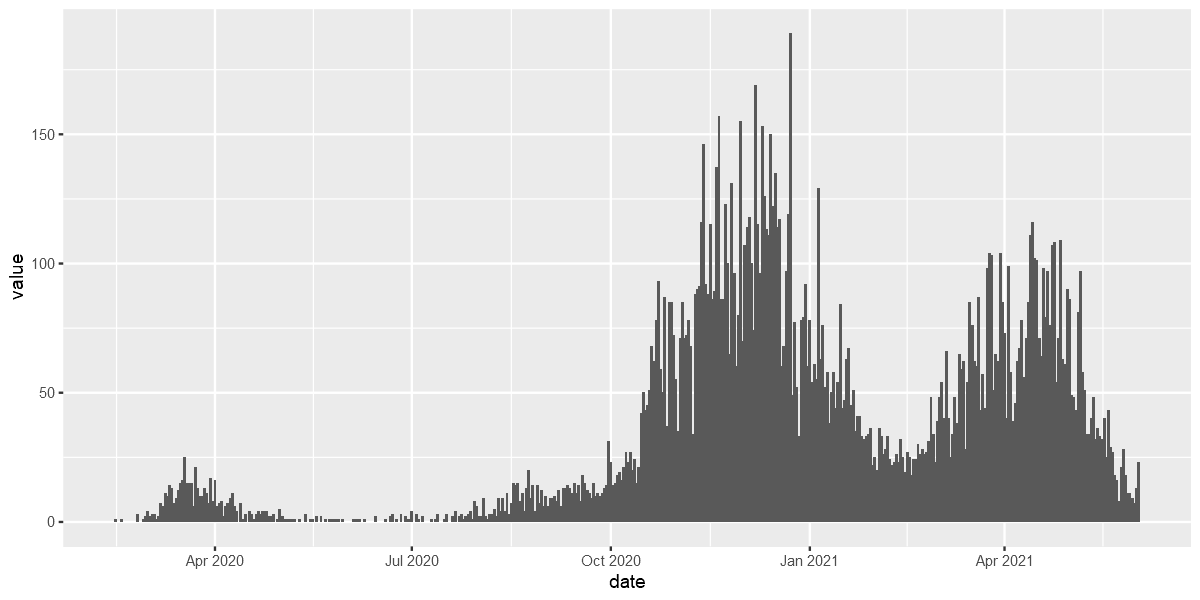

In [3]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(data = mannheim.incidence.long, aes(x=date, y=value)) +
  geom_bar(stat="identity")

### Darstellung mit gleitendem 7-Tage-Durchschnitt

Warning message:
"Removed 6 rows containing missing values (position_stack)."


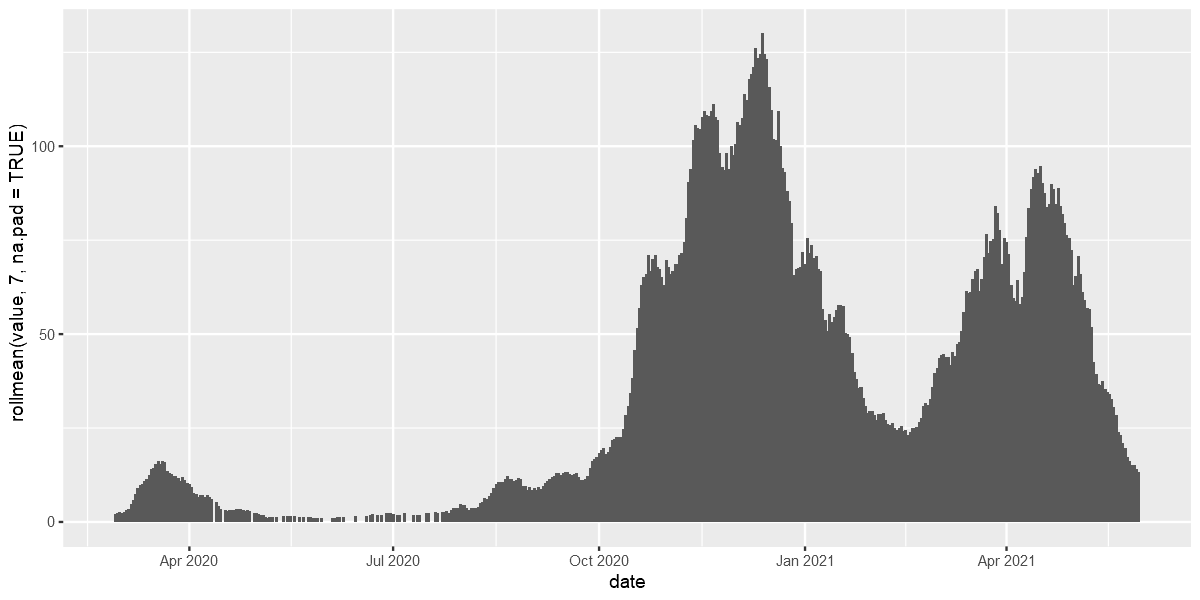

In [4]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(data = mannheim.incidence.long, aes(x=date, y=rollmean(value, 7, na.pad=TRUE))) +
  geom_bar(stat="identity")

## Daten zu Maßnahmen gegen Covid19-Pandemie ergänzen

### Quelle: Covid19 Government Response Tracker der Oxford University

* Homepage: https://www.bsg.ox.ac.uk/research/research-projects/covid-19-government-response-tracker
* Github Repo: https://github.com/OxCGRT/covid-policy-tracker
    * Rohdatensatz (CSV): https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/OxCGRT_latest.csv
    * Codebook: https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md

Quellenangabe:
Oxford COVID-19 Government Response Tracker, Blavatnik School of Government, University of Oxford.

Thomas Hale , Noam Angrist , Rafael Goldszmidt, Beatriz Kira , Anna Petherick , Toby Phillips, Samuel Webster, Emily Cameron-Blake , Laura Hallas, Saptarshi Majumdar, and Helen Tatlow. (2021). “A global panel database of pandemic policies (Oxford COVID-19 Government Response Tracker).” Nature Human Behaviour.


In [9]:
germany.response.raw <- read_csv("https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_nat_latest.csv",
                                 col_types = cols(`CountryName`=col_character(), `CountryCode`=col_character(), `RegionName`=col_character(), `RegionCode`=col_character(), `Jurisdiction`=col_character(), `Date`=col_character(), `C1M_School closing`=col_double(), `C1M_Flag`=col_double(), `C2M_Workplace closing`=col_double(), `C2M_Flag`=col_double(), `C3M_Cancel public events`=col_double(), `C3M_Flag`=col_double(), `C4M_Restrictions on gatherings`=col_double(), `C4M_Flag`=col_double(), `C5M_Close public transport`=col_double(), `C5M_Flag`=col_double(), `C6M_Stay at home requirements`=col_double(), `C6M_Flag`=col_double(), `C7M_Restrictions on internal movement`=col_double(), `C7M_Flag`=col_double(), `C8EV_International travel controls`=col_double(), `E1_Income support`=col_double(), `E1_Flag`=col_double(), `E2_Debt/contract relief`=col_double(), `E3_Fiscal measures`=col_double(), `E4_International support`=col_double(), `H1_Public information campaigns`=col_double(), `H1_Flag`=col_double(), `H2_Testing policy`=col_double(), `H3_Contact tracing`=col_double(), `H4_Emergency investment in healthcare`=col_double(), `H5_Investment in vaccines`=col_double(), `H6M_Facial Coverings`=col_double(), `H6M_Flag`=col_double(), `H7_Vaccination policy`=col_double(), `H7_Flag`=col_double(), `H8M_Protection of elderly people`=col_double(), `H8M_Flag`=col_double(), `M1_Wildcard`=col_double(), `V1_Vaccine Prioritisation (summary)`=col_double(), `V2A_Vaccine Availability (summary)`=col_double(), `V2B_Vaccine age eligibility/availability age floor (general population summary)`=col_character(), `V2C_Vaccine age eligibility/availability age floor (at risk summary)`=col_character(), `V2D_Medically/ clinically vulnerable (Non-elderly)`=col_double(), `V2E_Education`=col_double(), `V2F_Frontline workers  (non healthcare)`=col_double(), `V2G_Frontline workers  (healthcare)`=col_double(), `V3_Vaccine Financial Support (summary)`=col_double(), `V4_Mandatory Vaccination (summary)`=col_double(), `ConfirmedCases`=col_double(), `ConfirmedDeaths`=col_double(), `MajorityVaccinated`=col_character(), `PopulationVaccinated`=col_double(), `StringencyIndex_Average`=col_double(), `StringencyIndex_Average_ForDisplay`=col_double(), `GovernmentResponseIndex_Average`=col_double(), `GovernmentResponseIndex_Average_ForDisplay`=col_double(), `ContainmentHealthIndex_Average`=col_double(), `ContainmentHealthIndex_Average_ForDisplay`=col_double(), `EconomicSupportIndex`=col_double(), `EconomicSupportIndex_ForDisplay`=col_double()))
head(germany.response.raw %>% filter(CountryName == "Germany", grepl("202101", Date)))

CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex,EconomicSupportIndex_ForDisplay
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,...,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Germany,DEU,NA,NA,NAT_TOTAL,20210101,3,1,3,1,...,NV,0,82.41,82.41,69.17,69.17,73.69,73.69,37.5,37.5
Germany,DEU,NA,NA,NAT_TOTAL,20210102,3,1,3,1,...,NV,0,82.41,82.41,69.17,69.17,73.69,73.69,37.5,37.5
Germany,DEU,NA,NA,NAT_TOTAL,20210103,3,1,3,1,...,NV,0,82.41,82.41,69.17,69.17,73.69,73.69,37.5,37.5
Germany,DEU,NA,NA,NAT_TOTAL,20210104,3,1,3,1,...,NV,0,82.41,82.41,69.17,69.17,73.69,73.69,37.5,37.5
Germany,DEU,NA,NA,NAT_TOTAL,20210105,3,1,3,1,...,NV,0,85.19,85.19,67.60,67.60,71.90,71.90,37.5,37.5
Germany,DEU,NA,NA,NAT_TOTAL,20210106,3,1,3,1,...,NV,0,85.19,85.19,67.60,67.60,71.90,71.90,37.5,37.5


## Beispielhafte Konvertierung von 3 Attributen in ein Long-Format

In [10]:
germany.response.long <- pivot_longer(germany.response.raw %>%
             filter(CountryName == "Germany") %>% # Filterung auf Deutschland
             select(Date, `C1M_School closing`, `C4M_Restrictions on gatherings`, `C6M_Stay at home requirements`), # benötigte Spalten selektieren
             !Date, # Spalte(n), die "im rechten Teil" pivotiert werden sollen.
                    # Vorsicht Trick: hier wird mit dem Ausrufezeichen "negiert", d.h. wir geben die (eine) Spalte an,
                    # die "im linken Teil" stehenbleiben soll
             names_to = "variable", # Spalte, in die die Namen der pivotierten Spalten überführt werden sollen
             values_to = "value"    # Spalte, in die die Inhalte der pivotierten Spalten überführt werden sollen
)
germany.response.long$Date <- ymd(germany.response.long$Date) # Text in Date-Spalte in echtes Datum konvertieren
germany.response.long$category <- "response" # Spalte mit Datenkategorie ergänzen
germany.response.long <- germany.response.long %>% rename(date = Date) # Date-Spalte umbenennen, um sie mit den Inzidenzdaten zu vereinheitlichen

head(germany.response.long %>% filter(grepl("2021-01", date)), 10)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

date,variable,value,category
<date>,<chr>,<dbl>,<chr>
2021-01-01,C1M_School closing,3,response
2021-01-01,C4M_Restrictions on gatherings,4,response
2021-01-01,C6M_Stay at home requirements,2,response
2021-01-02,C1M_School closing,3,response
2021-01-02,C4M_Restrictions on gatherings,4,response
2021-01-02,C6M_Stay at home requirements,2,response
2021-01-03,C1M_School closing,3,response
2021-01-03,C4M_Restrictions on gatherings,4,response
2021-01-03,C6M_Stay at home requirements,2,response


## Maßnahmen plotten

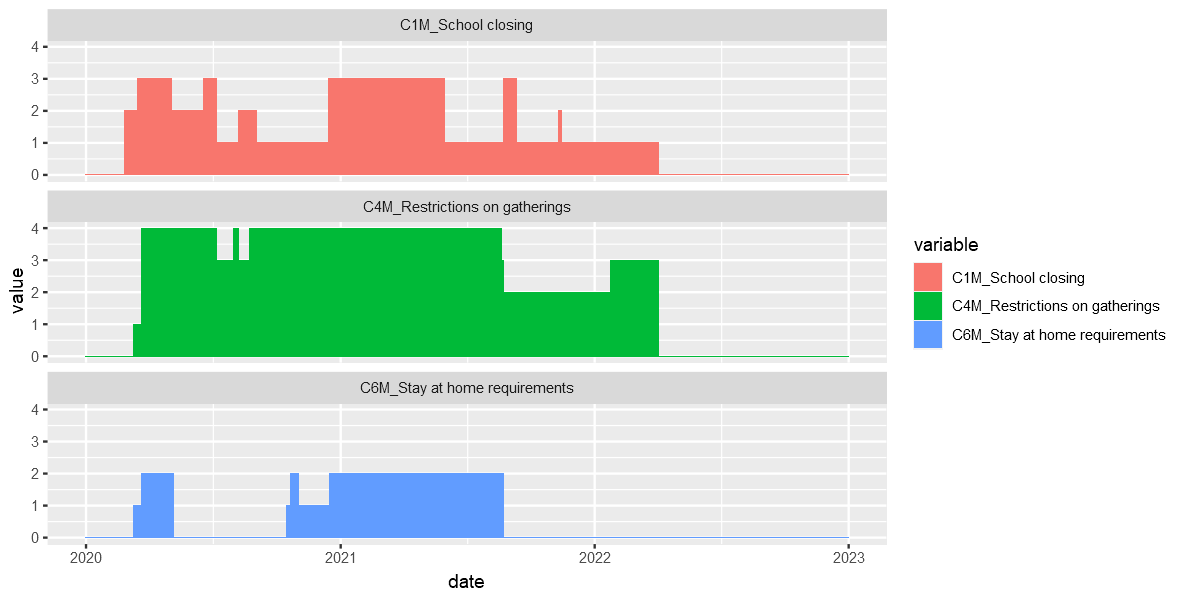

In [11]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(data = germany.response.long, aes(x=date, y=value, fill=variable)) +
  geom_bar(stat="identity") +
  facet_wrap(~variable, ncol=1)

## Inzidenz & Maßnahmen zusammenführen & gemeinsam plotten

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"Removed 6 rows containing missing values (position_stack)."


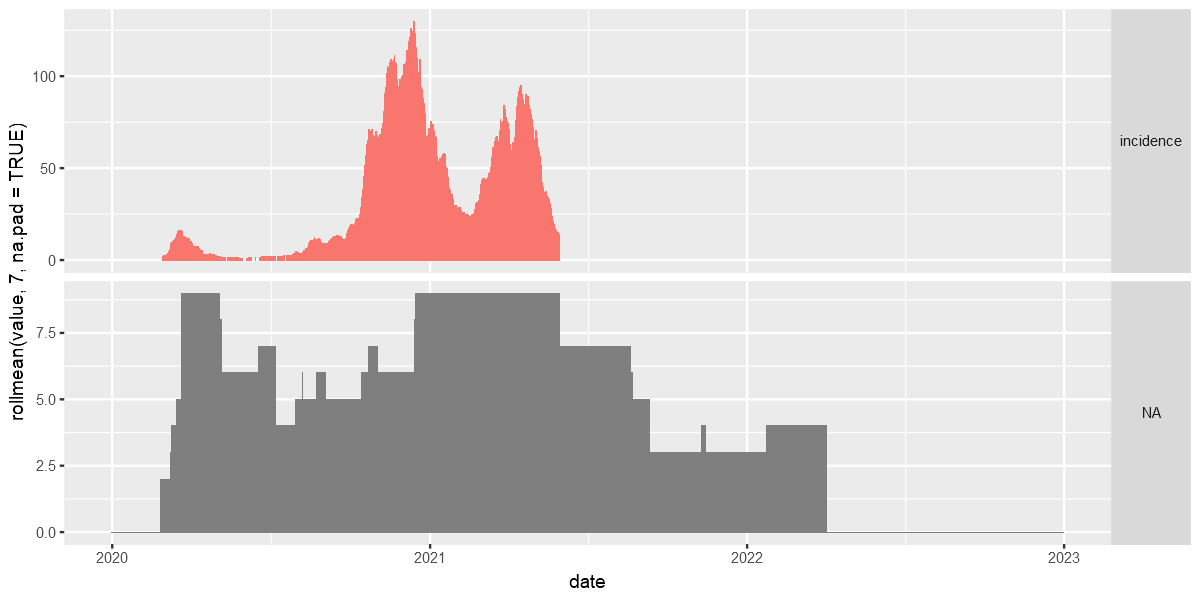

In [12]:
# Teildatensätze "hintereinander" zusammenführen (vgl. SQL UNION Statement)
mannheim.all.long <- bind_rows(mannheim.incidence.long, germany.response.long)

# Reihenfolge der Plots definieren
mannheim.all.long$variable <- factor(mannheim.all.long$variable, levels = c("incidence", "C1_School closing", "C4_Restrictions on gatherings", "C6_Stay at home requirements"))

# Daten in gemeinsamem Plot darstellen
ggplot(data = mannheim.all.long) +
  # Inzidenz-Plot (Darstellung mit gleitendendem Mittelwert)
  geom_bar(data = mannheim.all.long %>% filter(category %in% c("incidence")), aes(x=date, y=rollmean(value, 7, na.pad=TRUE), fill=variable), stat="identity") +
  # Maßnahmen-Plots (direkte Darstellung der Werte ohne gleitenden Mittelwert)
  geom_bar(data = mannheim.all.long %>% filter(category %in% c("response")), aes(x=date, y=value, fill=variable), stat="identity") +
  # Verteilung der Kurven n auf getrennte Plots
  facet_grid(fct_rev(variable) ~ ., scales="free_y") +
  # Darstellung der Plot-Titel rechts und nicht hochkant
  theme(strip.text.y.right = element_text(angle = 0)) +
  # Ausblenden der Legende
  guides(fill=FALSE)

## Mobilitätsdaten hinzufügen

### Quelle: Apple Covid19 Mobilitätstrends

* Homepage: https://covid19.apple.com/mobility
    * siehe dort für Nutzungsbedingungen (kein direkter Link verfügbar), Download der Rohdaten
    
Daten liegen in "wide"-Format mit einer Zeile pro Verkehrsmittel (Laufen, ÖPNV, Auto) und je einer Spalte pro Tag vor, aufgelöst für Deutschland bis auf Kreise (also 3 Zeilen von Kreis)

Aufbereitung für den Kurs: Filterung auf Mannheim, Selektion relevanter Spalten, Verschiebung der Skale von 100 +/- Änderung auf 0 +/- Änderung, Pivotierung in "long"-Format

In [13]:
mannheim.mobility.long <- read_delim(paste(base_url, "covid_mannheim_mobility.csv", sep=""),
                                     col_types = cols(date = col_date(format = ""), category = col_character(), variable = col_character(), value = col_double()),
                                     delim = ";", locale=locale(decimal_mark = ","))
head(mannheim.mobility.long)

date,category,variable,value
<date>,<chr>,<chr>,<dbl>
2020-01-13,mobility,driving,0.00
2020-01-14,mobility,driving,1.72
2020-01-15,mobility,driving,4.28
2020-01-16,mobility,driving,5.82
2020-01-17,mobility,driving,10.31
2020-01-18,mobility,driving,9.00


## Inzidenz-, Maßnahmen & Mobilitätsdaten gemeinsam plotten

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message:
"Removed 51 rows containing missing values (position_stack)."


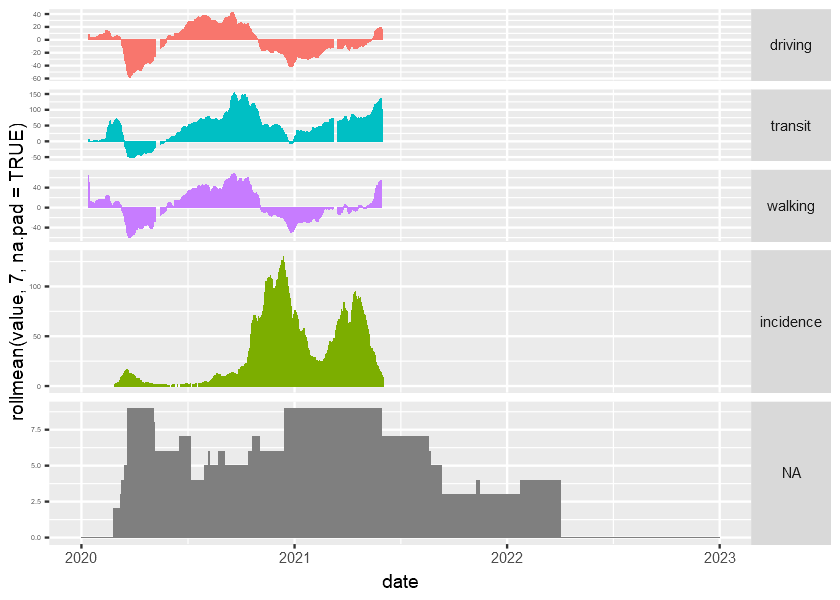

In [14]:
# Teildatensätze "hintereinander" zusammenführen (vgl. SQL UNION Statement)
mannheim.all.long <- bind_rows(mannheim.incidence.long, germany.response.long, mannheim.mobility.long)

# Reihenfolge der Plots definieren
mannheim.all.long$variable <- factor(mannheim.all.long$variable, levels = c("incidence", "walking", "transit", "driving", "C1_School closing", "C4_Restrictions on gatherings", "C6_Stay at home requirements"))

# Daten in gemeinsamem Plot darstellen
options(repr.plot.width = 7, repr.plot.height = 5)
plot <- ggplot(data = mannheim.all.long) +
  # Inzidenz- & Mobility-Plots (Darstellung mit gleitendendem Mittelwert)
  geom_bar(data = mannheim.all.long %>% filter(category %in% c("incidence", "mobility")), aes(x=date, y=rollmean(value, 7, na.pad=TRUE), fill=variable), stat="identity") +
  # Maßnahmen-Plots (direkte Darstellung der Werte ohne gleitenden Mittelwert)
  geom_bar(data = mannheim.all.long %>% filter(category %in% c("response")), aes(x=date, y=value, fill=variable), stat="identity") +
  # Verteilung der Kurven auf getrennte Plots
  facet_grid(fct_rev(variable) ~ ., scales="free_y") +
  # Darstellung der Plot-Titel rechts und nicht hochkant, kleine Achsenbeschriftung
  theme(strip.text.y.right = element_text(angle = 0), axis.text.y = element_text(size=4)) +
  # Ausblenden der Legende
  guides(fill="none")

# Größen der Plots anpassen
gt = ggplot_gtable(ggplot_build(plot))
gt$heights[7]  = 0.5*gt$heights[7]
gt$heights[9]  = 0.5*gt$heights[9]
gt$heights[11] = 0.5*gt$heights[11]
gt$heights[19] = 5  *gt$heights[19]
grid.draw(gt)